# original format

In [5]:
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import numpy as np


from functions import bbox_to_rect

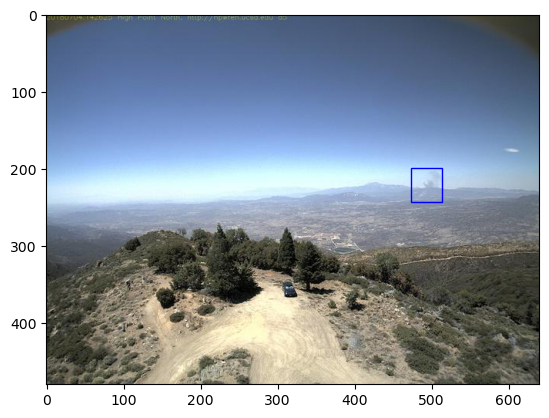

In [5]:
imageIndex = 'ck0kmh9hhkg5e0a46we9ywaxl_jpeg.rf.05a2d3d0278ae39a0a626bfd173d6b94'
imagePath = '../train/{}.jpg'.format(imageIndex)
bbox = [473,198,513,243]

imageArray = plt.imread(imagePath)

fig = plt.imshow(imageArray)

fig.axes.add_patch(bbox_to_rect(bbox, 'blue'))

# pascal format

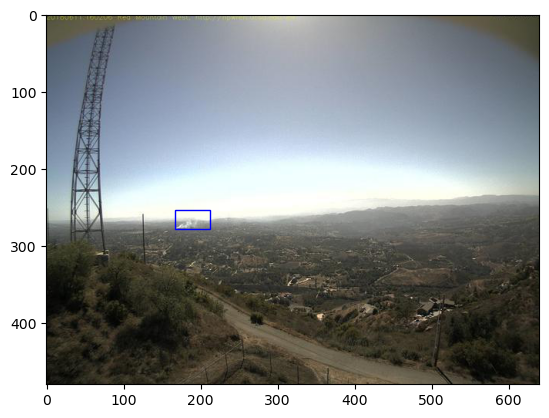

In [8]:
imageIndex = 'ck0t6zwah09e20a4695tura09_jpeg.rf.4f785256363fd90cb8a95a7d23e0f5a2'
imagePath = '../JPEGImages/{}.jpg'.format(imageIndex)
xmlPath = '../Annotations/{}.xml'.format(imageIndex)

# loading bounding boxes in xml
tree = ET.parse(xmlPath)
annotation = tree.getroot()
objects = annotation.findall('object')
objectNum = len(objects)
bboxes = np.zeros((objectNum,4))
for idx, object in enumerate(objects):
    bboxes[idx][0] = object.find('bndbox').find('xmin').text
    bboxes[idx][1] = object.find('bndbox').find('ymin').text
    bboxes[idx][2] = object.find('bndbox').find('xmax').text
    bboxes[idx][3] = object.find('bndbox').find('ymax').text

imageArray = plt.imread(imagePath)
fig = plt.imshow(imageArray)
for bbox in bboxes:
    fig.axes.add_patch(bbox_to_rect(bbox, 'blue'))